# Maligant Comments Classifier
SUBMITTED BY : AMAN KUMAR PATEL

BATCH : INTERNSHIP 25

SME : md. Kashif

# Problem Statement:
    
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive. Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. Data Set Description The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
Highly Malignant: It denotes comments that are highly malignant and hurtful.

Rude: It denotes comments that are very rude and offensive.

Threat: It contains indication of the comments that are giving any threat to someone.

Abuse: It is for comments that are abusive in nature.

Loathe: It describes the comments which are hateful and loathing in nature.

ID: It includes unique Ids associated with each comment text given.

Comment text: This column contains the comments extracted from various social media platforms. This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. You need to build a model that can differentiate between comments and its categories.
Refer to the data set file provided along with this.

In [1]:
!pip install wordcloud

In [2]:
#Importing all the required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from string import digits as d, punctuation as p
from nltk.tokenize import word_tokenize as wt
from nltk.stem import WordNetLemmatizer as wl, PorterStemmer as porter
from gensim import corpora

from sklearn.feature_extraction.text import TfidfVectorizer as tf
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import accuracy_score,classification_report,f1_score,auc,roc_curve,roc_auc_score,confusion_matrix,log_loss,\
precision_score,recall_score,mean_squared_error

from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from PIL import Image
import requests
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore',message="numpy.dtype size changed")
warnings.filterwarnings('ignore',message="numpy.ufunc size changed")
import joblib

In [3]:
# calling the data in train and test file
train=pd.read_csv("train.csv")

test=pd.read_csv("test.csv")

In [4]:
# looking for train dataset

train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
# looking for test dataset

test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
# checking the shape of train dataset

print("the rows and the columns of the train dataset",train.shape)

the rows and the columns of the train dataset (159571, 8)


observation :- here we cansee that the shape of train dataset

In [7]:
# checking the shape of test dataset

print("the rows and the columns of the test dataset",test.shape)

the rows and the columns of the test dataset (153164, 2)


Observation :- here we can see that the shape of test dataset

In [8]:
# checking the datatypes of train dataset

train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [9]:
# checking the datatypes of test datatest

test.dtypes

id              object
comment_text    object
dtype: object

here we can see in train dataset int, and string both of the data types are present and in the test dataset only string values are present


In [10]:
#checking if there is any duplicated values in training dataset

print('Number of duplicated values:-',train.duplicated().sum())

Number of duplicated values:- 0


In [11]:
#checking if there is any duplicated values in training dataset

print('Number of duplicated values:-',test.duplicated().sum())

Number of duplicated values:- 0


here we can see there are not any duplicate values in train and test values

In [12]:
# checking the null values for train dataset

train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

here we can see that there is not any null values in train dataset

In [13]:
# checkin the null values for test dataset

test.isnull().sum()

id              0
comment_text    0
dtype: int64

here we can see there not any null values in test datsset , but we take a look on heatmap

Text(0.5, 1.0, 'heatmap for train')

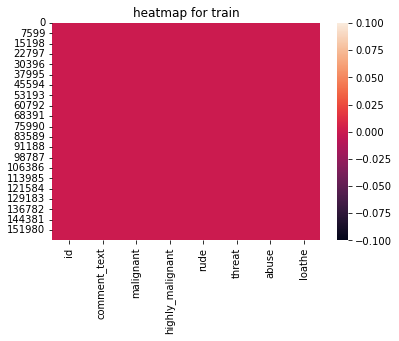

In [14]:
# Visualizing the same using heatmap.
sns.heatmap(train.isnull(),linewidths=0,linecolor='Black')
plt.title("heatmap for train")

Text(0.5, 1.0, 'Heatmap for test dataset')

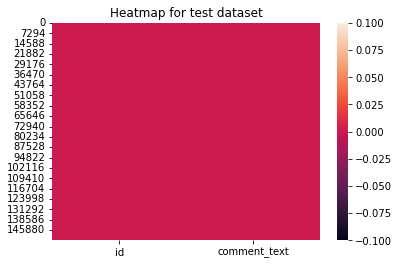

In [15]:
# visualising the same using heatmap for test
sns.heatmap(test.isnull(),linewidth=0,linecolor="Black")
plt.title("Heatmap for test dataset")

Here we have visualised both of the dataset and now we are confirmed that we don't have any type of null values in any of the dataset 

In [16]:
# now we will drop id column because it will not help to make model and also this column has all unique values

train.drop("id",axis=1,inplace=True)

In [17]:
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


dropping successfully

In [18]:
# Creating a list of all the labels to predict.

comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [19]:
# Statistical Summary of the train dataset.

train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


    - The minimum value and the maximum value of the attributes is same i.e. 0 and 1 respectievly.
    
    - The mean and standard deviation is nearly 0-1 of all the attributes in the training dataset.
    
    - Here, with this statistical analysis, it is interpreted that there are no outliers as weel as skewness present in 
    this training dataset.
    
    - The count of each field is equal which shows that there are no missing values present.

<AxesSubplot:>

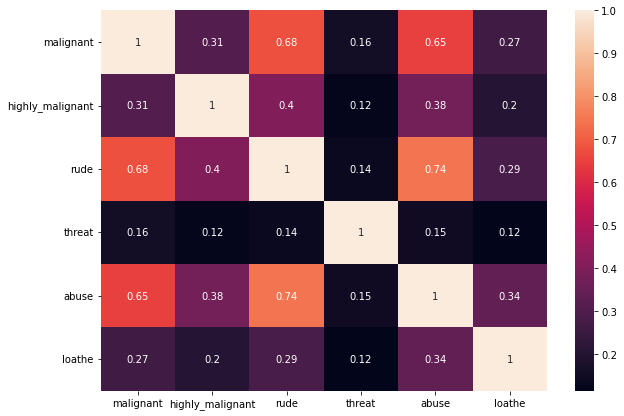

In [20]:
# Correlation of the train dataset is visualized using heatmap.

plt.figure(figsize=(10,7))
sns.heatmap(train.corr(), annot=True, linecolor="Black")

    - The highest positive correlation is seen in between fields 'rude' and 'abuse'.
    
    
    - Attribute 'threat' is negatively correlated with each and every other feature of this training dataset.
    
    - Overall the correlation among the attributes is not positive.

In [21]:
# dropping the test columns

test.drop(['id'],axis=1,inplace=True)

In [22]:
# Creating a 'nuetral' column in the train dataset.
# Depicting the comments having no toxicity i.e. the comments are not in any category preset in the dataste.

train['neutral'] = 1 - train[comments_labels].max(axis = 1)

In [23]:
# Checking the value counts of column - nuetr
train['neutral'].value_counts()

1    143346
0     16225
Name: neutral, dtype: int64

In [24]:
# Checking the dataset after creating a new feature.

train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,neutral
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,1


In [25]:
# Creating a column 'length_before_cleaning' in test dataset.
# Representing the length of the each comment respectively in a column 'comment_text' 

test['length_before_cleaning'] = test['comment_text'].map(lambda comment_text: len(comment_text))
test

,comment_text,length_before_cleaning
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41
...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",60
153160,== Throw from out field to home plate. == \n\n...,198
153161,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,""" \n\n == """"One of the founding nations of the...",502


In [26]:
cat_features = train[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe', 'neutral']]

In [27]:
# Checking the value counts of the variables.

for count in cat_features.columns:
    x = train[count].value_counts()
    print("***********",count,"********\n",x, '\n')

*********** malignant ********
 0    144277
1     15294
Name: malignant, dtype: int64 

*********** highly_malignant ********
 0    157976
1      1595
Name: highly_malignant, dtype: int64 

*********** rude ********
 0    151122
1      8449
Name: rude, dtype: int64 

*********** threat ********
 0    159093
1       478
Name: threat, dtype: int64 

*********** abuse ********
 0    151694
1      7877
Name: abuse, dtype: int64 

*********** loathe ********
 0    158166
1      1405
Name: loathe, dtype: int64 

*********** neutral ********
 1    143346
0     16225
Name: neutral, dtype: int64 



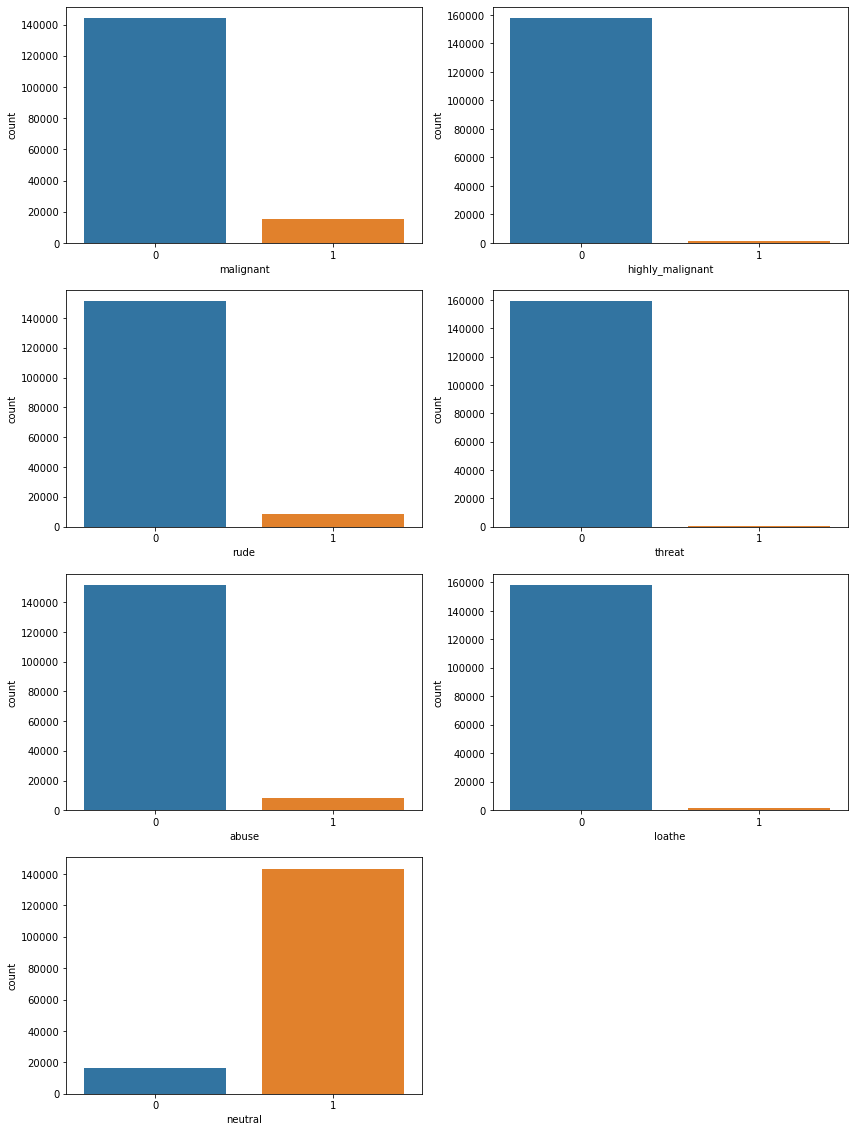

In [28]:
# Visualizing the count of categorical data using countplot.

count=1
plt.subplots(figsize=(14, 20))
for i in cat_features.columns:
    plt.subplot(4,2,count)
    sns.countplot(train[i], data = train)
    count+=1

plt.show()

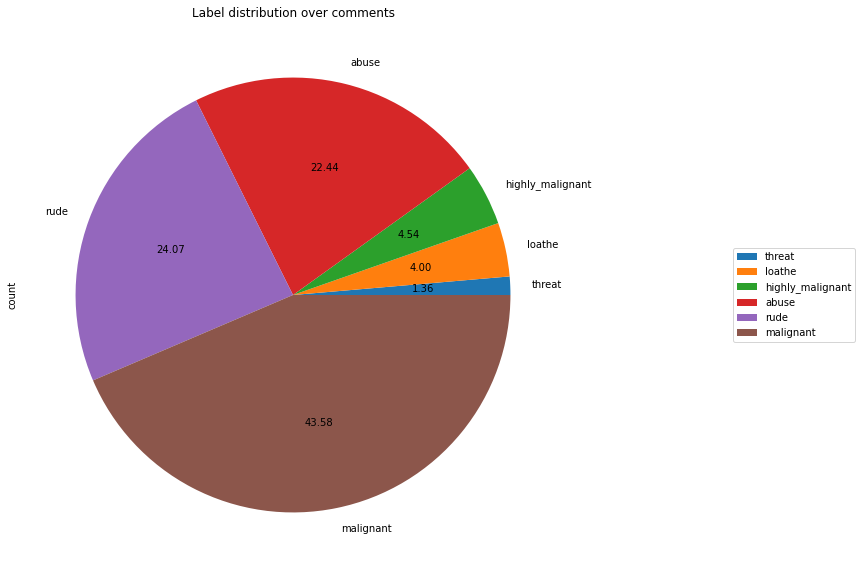

In [29]:
# Visualizing te label distribution of comments using pie chart.

df_distribution = train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

malignant is higher in all

<AxesSubplot:title={'center':'Labels Frequency'}>

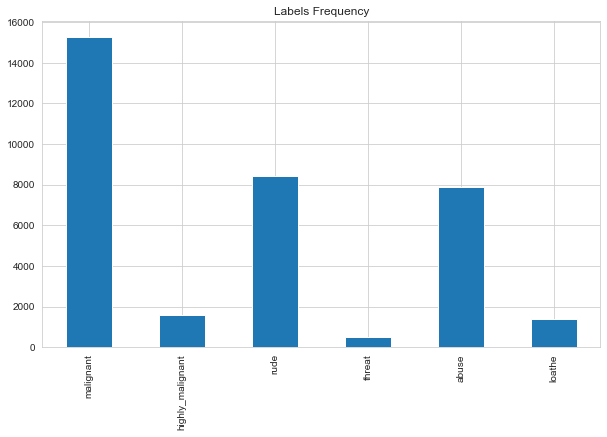

In [30]:
# Plotting the bar plot that show the total comment counts for different labels.

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
train[comments_labels].sum(axis=0).plot.bar(title='Labels Frequency')

    From the above plot, it is observed :
   
- "malignant" comment has the highest frequency of occurrence followed by "rude" and "abuse", respectively.

- On the other hand, a few comments belongs to the 'threat' category. 

- With the count of nearly 8000 the comments are categorised as 'rude' and 'abuse'.

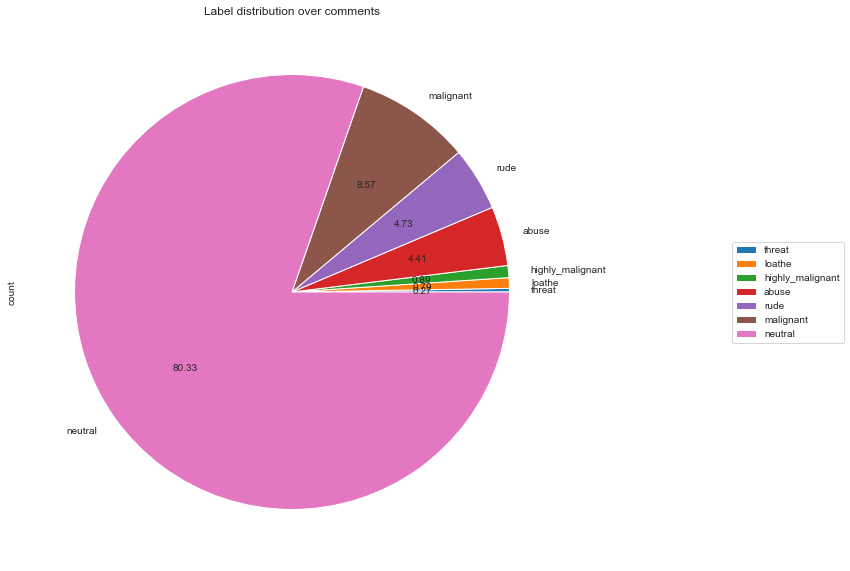

In [31]:
# Visualizing te label distribution of comments using pie chart when a new feature is created - 'nuetral'.

distribution = cat_features.sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

neutral comment is higher than all comment

Text(0.5, 0, 'Categories')

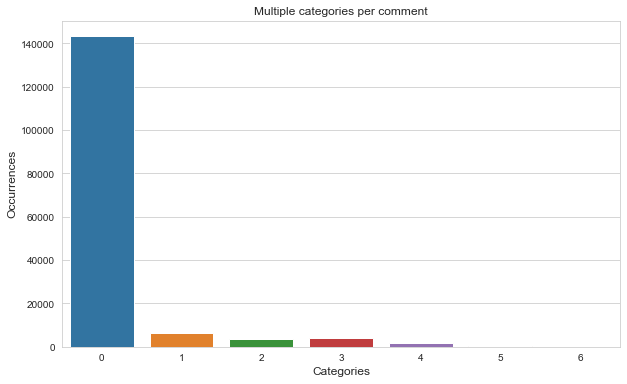

In [32]:
# Checking how many comments have multi-label with the help of barplot.

x = train[comments_labels].sum(axis=1).value_counts()
plt.figure(figsize=(10,6))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Categories', fontsize=12)

   Vast majority of the comment text are not labeled which is around 89%. This essentially shows that a large amount of 
    the entire dataset is tagged to none of the six labels.

<AxesSubplot:xlabel='comment_text', ylabel='Density'>

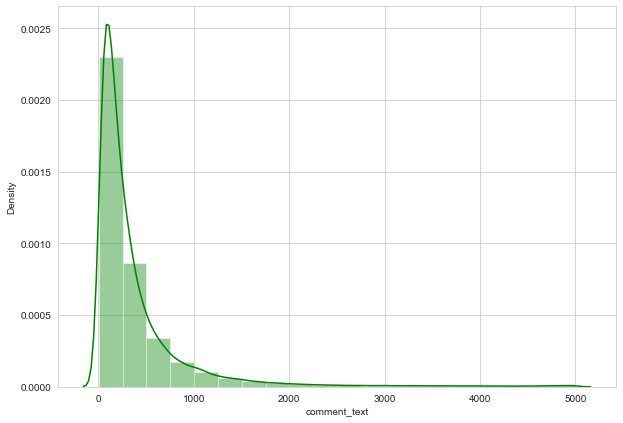

In [33]:
# Distribution of comments length.

plt.figure(figsize=(10,7))
comment_len = train.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'green')

    Above, is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few 
    comments longer than 1000 words. Majority of the comments are of length 500, where maximum length is 5000 and minimum 
    length is 5. Median length being 250.

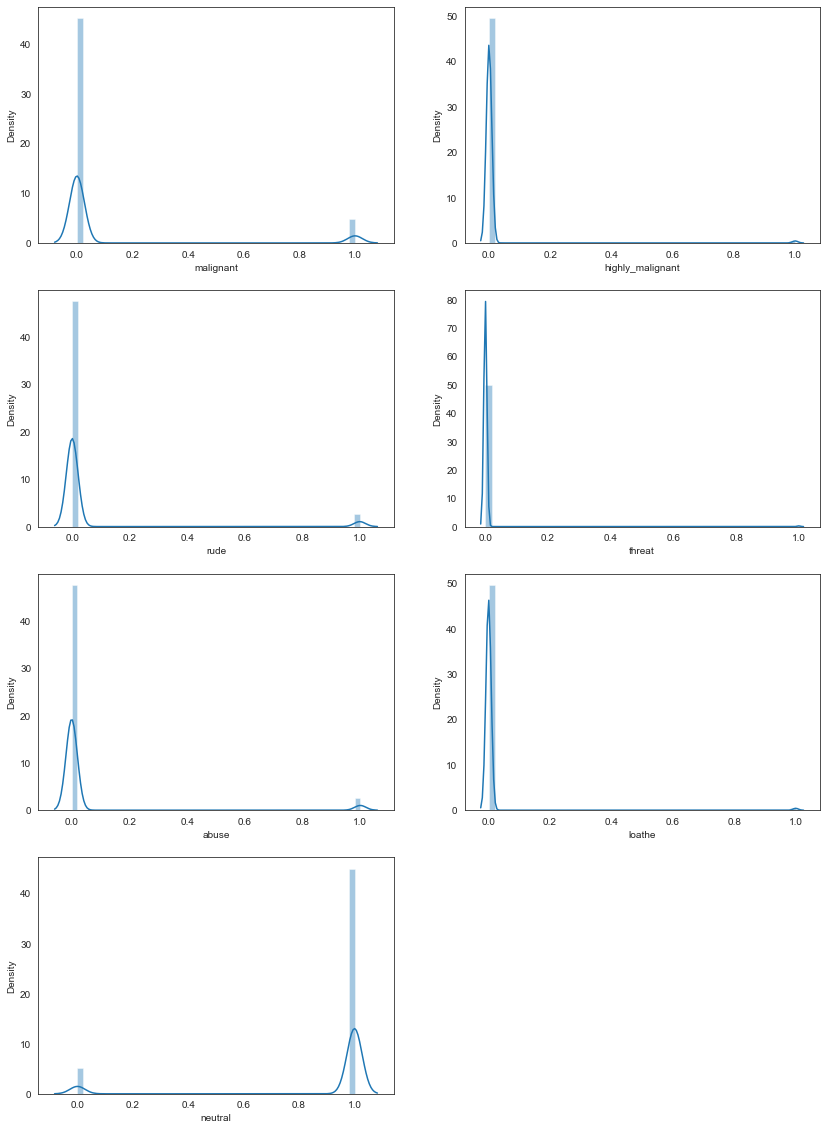

In [34]:
# Distribution of comments length label-wise or category-wise.

count = 1
sns.set_style('white')
plt.subplots(figsize=(14, 20))
for i in cat_features.columns:
    plt.subplot(4,2,count)
    sns.distplot(train[i])
    count+=1

plt.show()

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
 7   neutral           159571 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 9.7+ MB


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   comment_text            153164 non-null  object
 1   length_before_cleaning  153164 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [37]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe,neutral
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# wordclouds

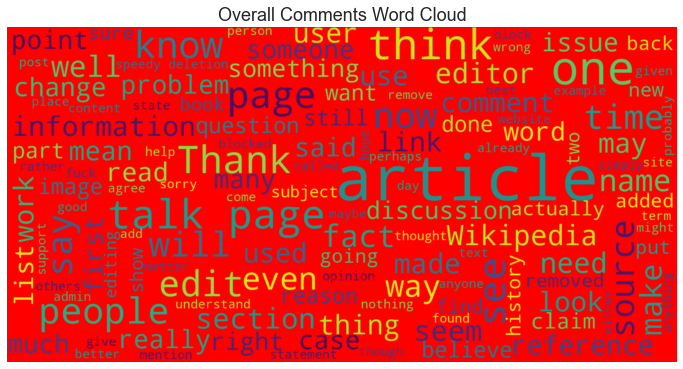

In [38]:
# Word Cloud for 'comment_text'

words = ' '.join([text for text in train['comment_text'] ])


word_cloud = WordCloud(
                       width=1600,
                       height=800,
                       margin=0,
                       max_words=500, # Max. numbers of words we want to see 
                       min_word_length=3, # Min. numbers of letters of each word to be part of the cloud
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="red").generate(words)

plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation="bilinear")
plt.title('Overall Comments Word Cloud', fontsize = 18)
plt.axis("off")
plt.show()

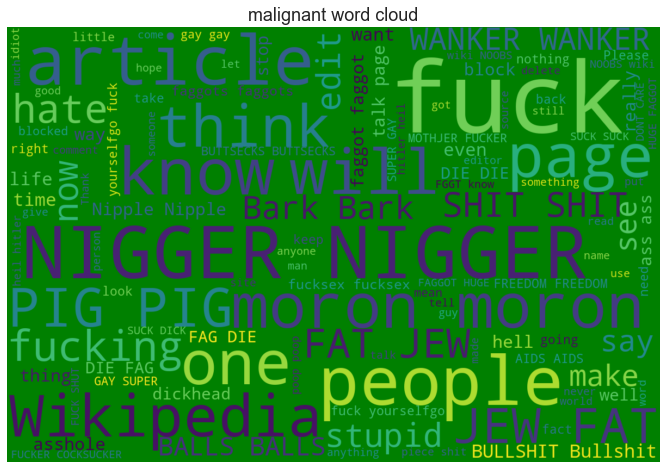

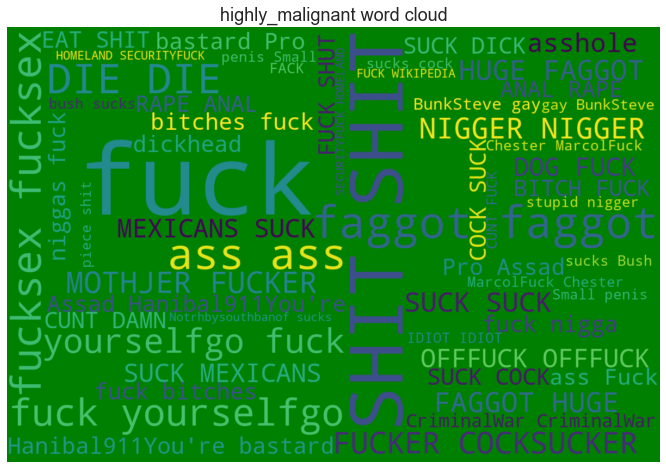

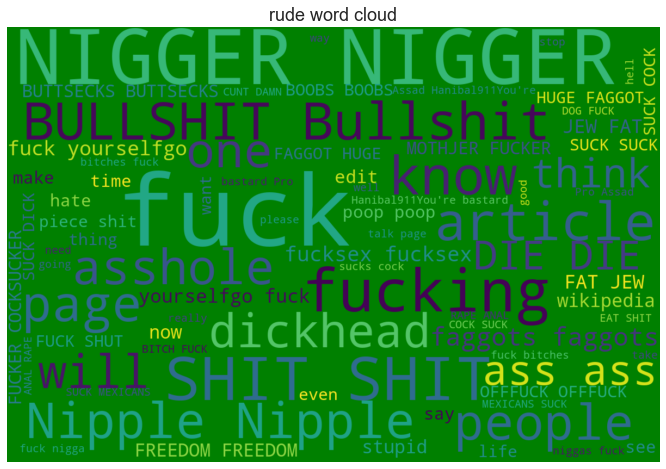

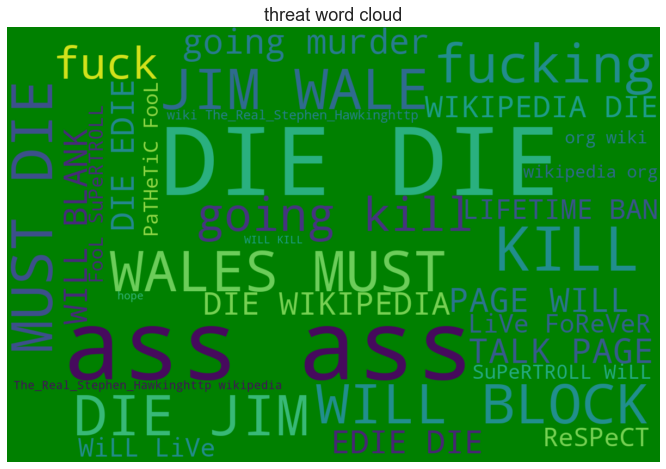

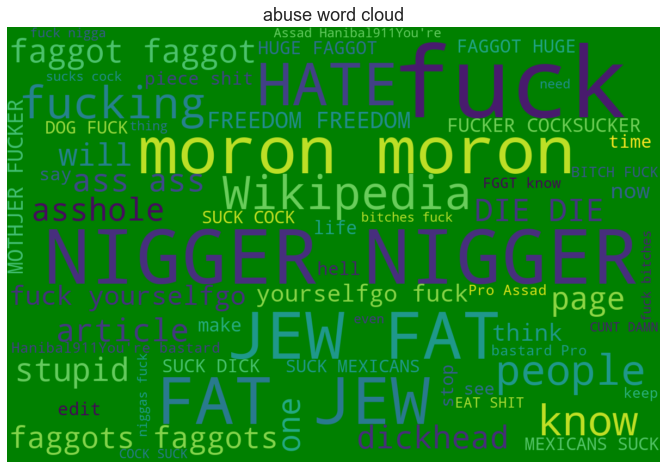

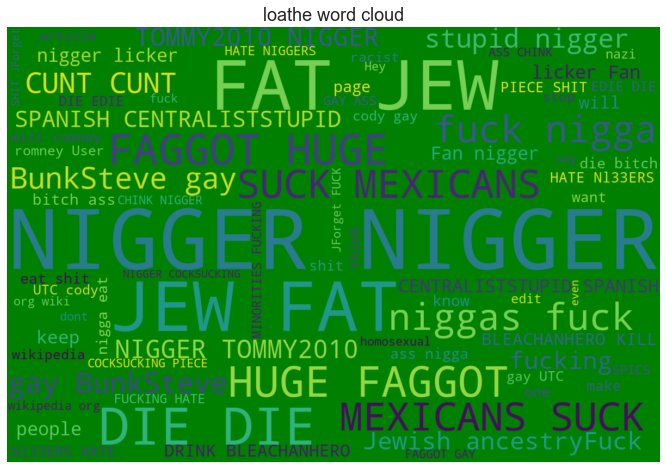

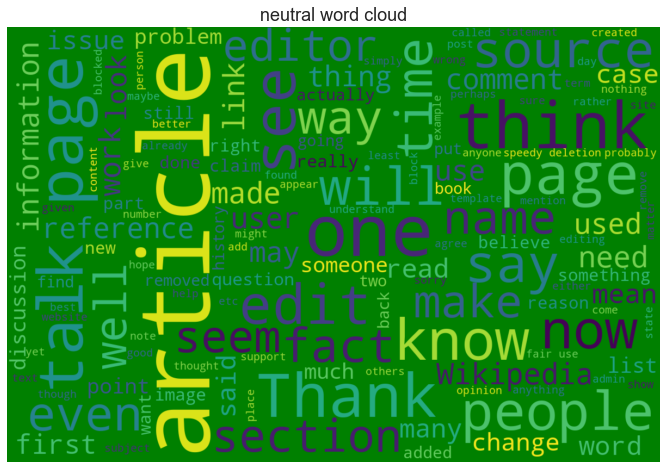

In [39]:
# Word cloud for the labels

for i in cat_features.columns:
    plt.figure(figsize=(12,8))
    label_words = " ".join(train[train[i] == 1]["comment_text"])
    
    word_cloud = WordCloud(width = 1200,
                           height = 800,
                           max_words = 400, 
                           min_word_length = 3,
                           max_font_size = 180, min_font_size = 20, 
                           background_color="green").generate(label_words)
    
    plt.title("{} word cloud".format(i), fontsize = 18)
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# preprocessing

In [40]:
# importing necessary librsries for stopwords

from nltk.corpus import stopwords

In [41]:
# downloading the stopwords package

import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GAMING\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# from ntlk library importing lemetizer

import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [43]:
# Defining the stop words

stop_words = stopwords.words('english')

# Defining the lemmatizer

lemmatizer = WordNetLemmatizer()

In [44]:
# in comment_text we will replace \n

train['comment_text'] = train['comment_text'].replace('\n',' ')

In [45]:
# Function Definition
def clean_comments(text):
    
    # convert to lower case
    lowered_text = text.lower()
    
    # Replacing email addresses with 'email'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'email', lowered_text)
    
    # Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    # Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    # Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    # Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    # Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    # Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    # Splitting data into words
    tokenized_text = word_tokenize(text)
    
    # Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [46]:
# importing important libraries for downloading punkt

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GAMING\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
# importing for 'omw-1.4' 

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\GAMING\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [48]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [49]:
# Calling the above function for the column - comment_text in training dataset.

train['comment_text'] = train['comment_text'].apply(clean_comments)
train['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [50]:
# Creating a column 'len_after_cleaning'
# Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.

train['len_after_cleaning'] = train['comment_text'].map(lambda comment_text: len(comment_text))
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,neutral,len_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,1,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,1,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,1,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,1,364
4,sir hero chance remember page,0,0,0,0,0,0,1,29
...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,1,178
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,1,36
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,1,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,1,56


In [51]:
# Calling the above function for the column - comment_text in test dataset.

test['comment_text'] = test['comment_text'].apply(clean_comments)
test['comment_text']

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [52]:
# Creating a column 'len_after_cleaning'
# Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.

test['len_after_cleaning'] = test['comment_text'].map(lambda comment_text: len(comment_text))
test

,comment_text,length_before_cleaning,len_after_cleaning
0,yo bitch ja rule succesful ever whats hating s...,367,235
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24
...,...,...,...
153159,totally agree stuff nothing long crap,60,37
153160,throw field home plate get faster throwing cut...,198,107
153161,okinotorishima category see change agree corre...,423,238
153162,one founding nation eu germany law return quit...,502,319


# seprating input and output variable

In [53]:
# Let's Separate the input and target variables represented by X and y respectively in train data.

X = train.comment_text
y = train[comments_labels]

# Let's Separate the input variable represented by test_X in test data.

test_X = test.comment_text

In [54]:
X.head()

0    explanation edits made username hardcore metal...
1    aww match background colour seemingly stuck th...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
Name: comment_text, dtype: object

In [55]:
y.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [56]:
test_X.head()

0    yo bitch ja rule succesful ever whats hating s...
1                                   rfc title fine imo
2                           source zawe ashton lapland
3    look back source information updated correct f...
4                             anonymously edit article
Name: comment_text, dtype: object

In [57]:
# Shape of input and output variables.

print(X.shape)
print(y.shape)
print(test_X.shape)

(159571,)
(159571, 6)
(153164,)


# Feature Scalling:-

TF-IDF is used to to scale down the impact of tokens that occur very frequently in a given corpus and that are 
hence empirically less informative than features that occur in a small fraction of the training corpus. This creates 
a sparse matrix with only a small number of non-zero elements.

In [58]:
# Converting the data into vectors

tf_vec = TfidfVectorizer(max_features=10000)

X_features = tf_vec.fit_transform(X)

test_X_features = tf_vec.fit_transform(test_X)

In [59]:
# Printing the shape of X_features and test_X_features.

print(X_features.shape)
print(test_X_features.shape)

(159571, 10000)
(153164, 10000)


# Training and Testing different algorithms and Model Evaluation

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Splitting the training and testing data 

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.20, random_state=42)

In [62]:
conda install -c conda-forge scikit-learn

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [63]:
from sklearn import tree

In [64]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import hamming_loss

In [65]:
# Creating the instances for the algorithms.

lg = LogisticRegression()
mnb = MultinomialNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()

In [66]:
models = []
models.append(('LogisticRegression', lg))
models.append(('MultinomialNB', mnb))
models.append(('DecisionTreeClassifier', dt))
models.append(('KNeighborsClassifier', knn))
models.append(('SVC', svc))
models.append(('RandomForestClassifier', rf))
models.append(('AdaBoostClassifier', ab))
models.append(('GradientBoostingClassifier', gb))

# Training and testing the models label - wise

In [67]:
# Creating the function for testing the algorithms label-wise.

def clf_scores(algo, X_train, X_test, y_train, y_test, labels):
    
    for label in labels:
        
        y_train_label = y_train[label]
        
        # train the model
        algo.fit(X_train, y_train_label)
        
        # compute the training accuracy
        pred = algo.predict(X_test)
        print ('---------- {}'.format(label),'----------', "\n")
        print('Training Accuracy : {}'.format(accuracy_score(y_train[label], algo.predict(X_train))), "\n")
        print('Test Accuracy : {}'.format(accuracy_score(y_test[label], pred)), "\n")
                
        # Computing Hamming Loss
        loss = hamming_loss(y_test[label], pred)
        print("Hamming_loss : {}".format(loss*100), "\n")
        
        # Computing log loss
        try : 
            loss = log_loss(y_test[label], pred)
        except :
            loss = log_loss(y_test[label], pred.toarray())
        print("Log_loss : {}".format(loss), "\n")
        
        # Computing classification report
        print("Classification Report :\n\n", classification_report(y_test[label], pred), "\n")
        
        # computing auc_roc score
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_test[label], pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print("ROC_AUC Score :", roc_auc, '\n\n')

In [68]:
# Logistic Regression

clf_scores(lg, X_train, X_test, y_train, y_test, comments_labels)

---------- malignant ---------- 

Training Accuracy : 0.9618819326941155 

Test Accuracy : 0.9583268055773148 

Hamming_loss : 4.167319442268526 

Log_loss : 1.439345753757117 

Classification Report :

               precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.91      0.62      0.74      3056

    accuracy                           0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915
 

ROC_AUC Score : 0.8093120863508785 


---------- highly_malignant ---------- 

Training Accuracy : 0.9909522466629066 

Test Accuracy : 0.9907253642487859 

Hamming_loss : 0.9274635751214162 

Log_loss : 0.32033617380946655 

Classification Report :

               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.58      0.28      0.38       321

    accuracy                           0.99     319

In [69]:
# RandomForest Classifier

clf_scores(rf, X_train, X_test, y_train, y_test, comments_labels)

---------- malignant ---------- 

Training Accuracy : 0.9990913078899543 

Test Accuracy : 0.9586088046373179 

Hamming_loss : 4.139119536268213 

Log_loss : 1.4296095342135806 

Classification Report :

               precision    recall  f1-score   support

           0       0.97      0.99      0.98     28859
           1       0.86      0.68      0.76      3056

    accuracy                           0.96     31915
   macro avg       0.91      0.83      0.87     31915
weighted avg       0.96      0.96      0.96     31915
 

ROC_AUC Score : 0.8322887807645369 


---------- highly_malignant ---------- 

Training Accuracy : 0.999388982891521 

Test Accuracy : 0.9897227009243302 

Hamming_loss : 1.0277299075669748 

Log_loss : 0.3549660612832903 

Classification Report :

               precision    recall  f1-score   support

           0       0.99      1.00      0.99     31594
           1       0.43      0.07      0.12       321

    accuracy                           0.99     3191

# Training and testing the models on Overall Basis

In [70]:
# Creating the function for evaluationg the models on over-all basis.

def clf_scores_all(algo, X_train, X_test, y_train, y_test, labels):
    
    predict_train = []
    predict = []
    
    for label in labels:
        
        y_train_label = y_train[label]
        
        # train the model
        algo.fit(X_train, y_train_label)
        
        # compute the training accuracy
        predict_train.append(algo.predict(X_train))
        predict.append(algo.predict(X_test))
        
    predict_train = np.asarray(np.transpose(predict_train))
    predict = np.asarray(np.transpose(predict))
    
    # compute the training accuracy
    print('Training Accuracy : {}'.format(accuracy_score(y_train, predict_train)), "\n")
    print('Test Accuracy : {}'.format(accuracy_score(y_test, predict)), "\n")

    # Computing Hamming Loss
    loss = hamming_loss(y_test, predict)
    print("Hamming_loss : {}".format(loss*100), "\n")

    # Computing log loss
    try : 
        loss = log_loss(y_test, predict)
    except :
        loss = log_loss(y_test, predict.toarray())
    print("Log_loss : {}".format(loss), "\n")

    # Computing classification report
    print("Classification Report :\n\n", classification_report(y_test, predict), "\n")

In [71]:
# Logistic Regression

clf_scores_all(lg, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.9253149088174469 

Test Accuracy : 0.9205702647657841 

Hamming_loss : 1.8888714815395062 

Log_loss : 1.560009090408967 

Classification Report :

               precision    recall  f1-score   support

           0       0.91      0.62      0.74      3056
           1       0.58      0.28      0.38       321
           2       0.92      0.64      0.76      1715
           3       0.71      0.14      0.23        74
           4       0.83      0.52      0.64      1614
           5       0.74      0.17      0.28       294

   micro avg       0.88      0.57      0.69      7074
   macro avg       0.78      0.40      0.50      7074
weighted avg       0.87      0.57      0.68      7074
 samples avg       0.06      0.05      0.05      7074
 



In [72]:
# MultinomialNB

clf_scores_all(mnb, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.9158441436360218 

Test Accuracy : 0.9123296255679147 

Hamming_loss : 2.2345814402840882 

Log_loss : 1.72361976367962 

Classification Report :

               precision    recall  f1-score   support

           0       0.92      0.52      0.67      3056
           1       0.69      0.11      0.19       321
           2       0.90      0.51      0.65      1715
           3       0.00      0.00      0.00        74
           4       0.83      0.42      0.56      1614
           5       0.56      0.03      0.06       294

   micro avg       0.89      0.45      0.60      7074
   macro avg       0.65      0.26      0.35      7074
weighted avg       0.86      0.45      0.58      7074
 samples avg       0.05      0.04      0.04      7074
 



In [73]:
# SVC

clf_scores_all(svc, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.9573698063545779 

Test Accuracy : 0.9197869340435532 

Hamming_loss : 1.8523160478353962 

Log_loss : 1.609594591665596 

Classification Report :

               precision    recall  f1-score   support

           0       0.91      0.64      0.75      3056
           1       0.52      0.08      0.14       321
           2       0.89      0.68      0.77      1715
           3       0.56      0.07      0.12        74
           4       0.82      0.56      0.66      1614
           5       0.82      0.14      0.24       294

   micro avg       0.88      0.58      0.70      7074
   macro avg       0.75      0.36      0.45      7074
weighted avg       0.86      0.58      0.68      7074
 samples avg       0.06      0.05      0.05      7074
 



In [74]:
# RandomForest Classifier

clf_scores_all(rf, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.9971720874851162 

Test Accuracy : 0.9162776124079587 

Hamming_loss : 1.9092380803175102 

Log_loss : 1.5850233961740952 

Classification Report :

               precision    recall  f1-score   support

           0       0.86      0.68      0.76      3056
           1       0.44      0.06      0.10       321
           2       0.86      0.73      0.79      1715
           3       0.44      0.05      0.10        74
           4       0.76      0.57      0.65      1614
           5       0.75      0.14      0.24       294

   micro avg       0.83      0.61      0.70      7074
   macro avg       0.68      0.37      0.44      7074
weighted avg       0.81      0.61      0.68      7074
 samples avg       0.06      0.05      0.06      7074
 



In [75]:
clf_scores_all(gb, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.9172306824591089 

Test Accuracy : 0.9127682907723641 

Hamming_loss : 2.2700924330252232 

Log_loss : 1.367584734898097 

Classification Report :

               precision    recall  f1-score   support

           0       0.94      0.43      0.59      3056
           1       0.53      0.21      0.31       321
           2       0.91      0.60      0.72      1715
           3       0.30      0.12      0.17        74
           4       0.81      0.44      0.57      1614
           5       0.61      0.23      0.34       294

   micro avg       0.87      0.45      0.60      7074
   macro avg       0.68      0.34      0.45      7074
weighted avg       0.86      0.45      0.59      7074
 samples avg       0.04      0.04      0.04      7074
 



In [76]:
clf_scores_all(knn, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.9113946857178667 

Test Accuracy : 0.8985430048566505 

Hamming_loss : 3.081100840774975 

Log_loss : 0.8905933217255222 

Classification Report :

               precision    recall  f1-score   support

           0       0.72      0.27      0.39      3056
           1       0.42      0.14      0.21       321
           2       0.82      0.30      0.44      1715
           3       0.47      0.09      0.16        74
           4       0.73      0.26      0.38      1614
           5       0.76      0.10      0.17       294

   micro avg       0.73      0.26      0.38      7074
   macro avg       0.65      0.19      0.29      7074
weighted avg       0.73      0.26      0.38      7074
 samples avg       0.02      0.02      0.02      7074
 



In [77]:
clf_scores_all(ab, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.9107915021620605 

Test Accuracy : 0.9101676327745574 

Hamming_loss : 2.2721813149511725 

Log_loss : 1.8095966911906425 

Classification Report :

               precision    recall  f1-score   support

           0       0.88      0.54      0.67      3056
           1       0.49      0.28      0.35       321
           2       0.90      0.57      0.70      1715
           3       0.32      0.23      0.27        74
           4       0.79      0.37      0.51      1614
           5       0.52      0.21      0.30       294

   micro avg       0.83      0.48      0.61      7074
   macro avg       0.65      0.37      0.47      7074
weighted avg       0.82      0.48      0.61      7074
 samples avg       0.05      0.04      0.04      7074
 



In [117]:
# Creating the function for model evaluation using multi-label wrapper on various models.

def trainer_method(classifier):
    
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_test)

    # compute the training accuracy   
    print('Training Accuracy : {}'.format(accuracy_score(y_train, classifier.predict(X_train))), "\n")
    print('Test Accuracy : {}'.format(accuracy_score(y_test, predict)), "\n")

    # Computing Hamming Loss
    loss = hamming_loss(y_test, predict)
    print("Hamming_loss : {}".format(loss*100), "\n")

    # Computing log loss
    try : 
        loss = log_loss(y_test, predict)
    except :
        loss = log_loss(y_test, predict.toarray())
    print("Log_loss : {}".format(loss), "\n")

    # Computing classification report
    print("Classification Report :\n\n", classification_report(y_test, predict), "\n\n")
    
    
# Using oneVsRest Classifier wrapper
def runner_onevsrest(models):
    for name, model in models:
        print('----------', name, '----------\n')
        trainer_method(OneVsRestClassifier(model))

        
# Using Binary Relevance wrapper
def runner_binaryrelevance(models):
    for name, model in models:
        print('----------', name, '----------\n')
        trainer_method(BinaryRelevance(classifier = model, require_dense = [False, True]))

In [119]:
runner_onevsrest(models)

---------- LogisticRegression ----------

Training Accuracy : 0.9253149088174469 

Test Accuracy : 0.9205702647657841 

Hamming_loss : 1.8888714815395062 

Log_loss : 1.560009090408967 

Classification Report :

               precision    recall  f1-score   support

           0       0.91      0.62      0.74      3056
           1       0.58      0.28      0.38       321
           2       0.92      0.64      0.76      1715
           3       0.71      0.14      0.23        74
           4       0.83      0.52      0.64      1614
           5       0.74      0.17      0.28       294

   micro avg       0.88      0.57      0.69      7074
   macro avg       0.78      0.40      0.50      7074
weighted avg       0.87      0.57      0.68      7074
 samples avg       0.06      0.05      0.05      7074
 


---------- MultinomialNB ----------

Training Accuracy : 0.9158441436360218 

Test Accuracy : 0.9123296255679147 

Hamming_loss : 2.2345814402840882 

Log_loss : 1.72361976367962 

Classi

# Hypertuning the selected models using GridSearchCV

In [120]:
# Logistic Regression using Function - on overall basis

tuned_lg = LogisticRegression(penalty = 'l2')
clf_scores_all(tuned_lg, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.9253149088174469 

Test Accuracy : 0.9205702647657841 

Hamming_loss : 1.8888714815395062 

Log_loss : 1.560009090408967 

Classification Report :

               precision    recall  f1-score   support

           0       0.91      0.62      0.74      3056
           1       0.58      0.28      0.38       321
           2       0.92      0.64      0.76      1715
           3       0.71      0.14      0.23        74
           4       0.83      0.52      0.64      1614
           5       0.74      0.17      0.28       294

   micro avg       0.88      0.57      0.69      7074
   macro avg       0.78      0.40      0.50      7074
weighted avg       0.87      0.57      0.68      7074
 samples avg       0.06      0.05      0.05      7074
 



In [121]:
# SVC using Function - on overall basis

tuned_svc = SVC(kernel = 'linear', C = 1)

clf_scores_all(tuned_svc, X_train, X_test, y_train, y_test, comments_labels)

Training Accuracy : 0.9309707338472144 

Test Accuracy : 0.920037599874667 

Hamming_loss : 1.8178494960572353 

Log_loss : 1.6162164380407165 

Classification Report :

               precision    recall  f1-score   support

           0       0.89      0.67      0.76      3056
           1       0.76      0.04      0.08       321
           2       0.89      0.70      0.78      1715
           3       0.78      0.09      0.17        74
           4       0.79      0.58      0.67      1614
           5       0.83      0.16      0.27       294

   micro avg       0.87      0.60      0.71      7074
   macro avg       0.82      0.38      0.46      7074
weighted avg       0.86      0.60      0.69      7074
 samples avg       0.06      0.05      0.05      7074
 



In [123]:
# Random Forest Classifier

tuned_rf = RandomForestClassifier(bootstrap=True, 
                                  class_weight=None, 
                                  criterion='gini',
                                  max_depth=4,
                                  max_features='auto',
                                  max_leaf_nodes=4,
                                  min_impurity_decrease=0.0,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  min_weight_fraction_leaf=0.0,
                                  n_estimators=10,
                                  n_jobs=1,
                                  oob_score=False,
                                  random_state=None,
                                  verbose=0,
                                  warm_start=False)

In [124]:
trainer_method(OneVsRestClassifier(tuned_rf))

Training Accuracy : 0.8983126527542771 

Test Accuracy : 0.898355005483315 

Hamming_loss : 3.6931432450780717 

Log_loss : 0.4011377419421443 

Classification Report :

               precision    recall  f1-score   support

           0       1.00      0.00      0.00      3056
           1       0.00      0.00      0.00       321
           2       0.00      0.00      0.00      1715
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00      1614
           5       0.00      0.00      0.00       294

   micro avg       1.00      0.00      0.00      7074
   macro avg       0.17      0.00      0.00      7074
weighted avg       0.43      0.00      0.00      7074
 samples avg       0.00      0.00      0.00      7074
 




# Prediction values

In [125]:
# Predicting the values

classifier = OneVsRestClassifier(svc)
classifier.fit(X_features, y)
predict = classifier.predict(test_X_features)

In [126]:
# Printing the predicted values.

predict

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [127]:
# Loading the test dataset.

df_test = pd.read_csv("test.csv")
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [128]:
# Creating a column to add the predicted values in the test dataframe.

df_test_data = pd.DataFrame(predict, columns = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'])
df_test_data

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,0,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,1,0,1,0,0,0


In [129]:
# saving the data in a csv file.

df_test.to_csv('malignant_test.csv', index = False)

# Thank you :)